# Generalized Linkwitz-Riley Crossover

Some Links:
- https://jupyterbook.org/en/stable/content/math.html

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import signal

In [7]:
from filterdesign import emqf

In [13]:
order = 7
stopband_attenuation = 50 #dB

$$
  	H_1(s) = \underbrace{\frac{P_1(s)}{P(s)}}_{G_1(s)} \cdot \frac{P_1(-s)}{P(s)}
$$
$$
  	H_2(s) = \frac{P_2(s)}{P(s)} \cdot \frac{P_2(-s)}{P(s)}
$$
$$
  	H_{AP}(s) = H_1(s) + H_2(s) = \frac{P_1(s)}{P(s)}
$$
where $G_1(s) = \frac{P_1(s)}{P(s)}$ is an EMQF lowpass filter and $G_2(s) = \frac{P_2(s)}{P(s)}$ is the corresponding highpass filter according to the lowpass-to-highpass transformation $G_2(s) = G_1(1/s)$

In [14]:
G_1 = emqf.analog_lowpass(N=order, As=stopband_attenuation, f3db=True)

In [15]:
P_1

(array([-0.-1.34624907j, -0.+1.34624907j, -0.-1.62546101j, -0.+1.62546101j,
        -0.-2.80902711j, -0.+2.80902711j]),
 array([-0.10741165-0.99421463j, -0.10741165+0.99421463j,
        -0.37520952-0.92694003j, -0.37520952+0.92694003j,
        -0.754565  -0.65622532j, -0.754565  +0.65622532j,
        -1.        +0.j        ]),
 0.026465749142731806)

In [16]:
G_2 = signal.lp2hp_zpk(G_1[0], G_1[1], G_1[2], wo=1.0) # at w_0 is the -3dB frequency

In [17]:
G_2

(array([-0.+0.7428046j ,  0.-0.7428046j , -0.+0.61521008j,  0.-0.61521008j,
        -0.+0.35599514j,  0.-0.35599514j,  0.+0.j        ]),
 array([-0.10741165+0.99421463j, -0.10741165-0.99421463j,
        -0.37520952+0.92694003j, -0.37520952-0.92694003j,
        -0.754565  +0.65622532j, -0.754565  -0.65622532j,
        -1.        -0.j        ]),
 0.9999999999999993)

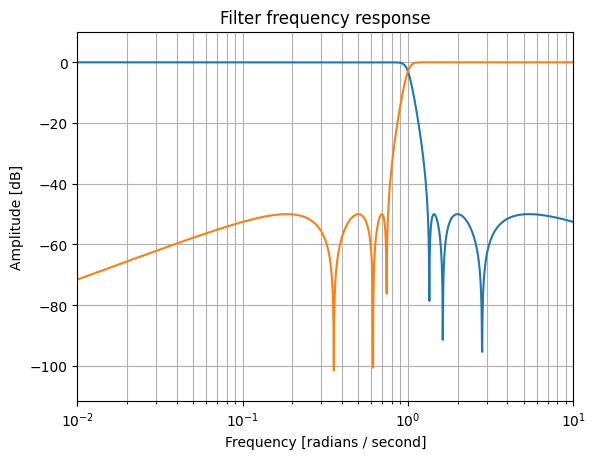

In [21]:
z, p , k = G_1
b, a = signal.zpk2tf(z, p, k)
w, h = signal.freqs(b, a, 2000)
plt.semilogx(w, 20 * np.log10(abs(h)))

z, p , k = G_2
b, a = signal.zpk2tf(z, p, k)
w, h = signal.freqs(b, a, 2000)
plt.semilogx(w, 20 * np.log10(abs(h)))

plt.title("Filter frequency response")
plt.xlabel("Frequency [radians / second]")
plt.ylabel("Amplitude [dB]")
plt.margins(0, 0.1)
plt.grid(which="both", axis="both")
# plt.axvline(100, color='green') # cutoff frequency
plt.show()